In [1]:
# Basic imports

import os
import zipfile

In [2]:
# List directory files

a_dir = os.path.join('asl_train/X')
b_dir = os.path.join('asl_train/Y')
c_dir = os.path.join('asl_train/Z')

print('total training A images:', len(os.listdir(a_dir)))
print('total training B images:', len(os.listdir(b_dir)))
print('total training C images:', len(os.listdir(c_dir)))

a_files = os.listdir(a_dir)
print(a_files[:10])

b_files = os.listdir(b_dir)
print(b_files[:10])

c_files = os.listdir(c_dir)
print(c_files[:10])

total training A images: 500
total training B images: 500
total training C images: 500
['X1.jpg', 'X10.jpg', 'X100.jpg', 'X101.jpg', 'X102.jpg', 'X103.jpg', 'X104.jpg', 'X105.jpg', 'X106.jpg', 'X107.jpg']
['Y1.jpg', 'Y10.jpg', 'Y100.jpg', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg']
['Z1.jpg', 'Z10.jpg', 'Z100.jpg', 'Z101.jpg', 'Z102.jpg', 'Z103.jpg', 'Z104.jpg', 'Z105.jpg', 'Z106.jpg', 'Z107.jpg']


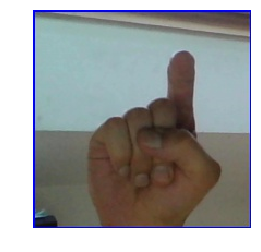

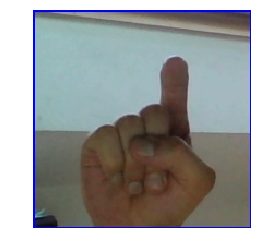

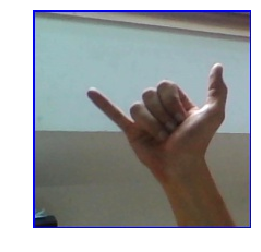

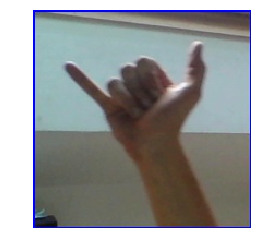

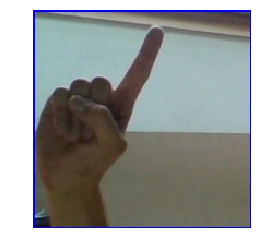

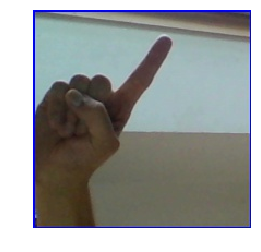

In [3]:
# Display sample images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_a = [os.path.join(a_dir, fname) 
                for fname in a_files[pic_index-2:pic_index]]
next_b = [os.path.join(b_dir, fname) 
                for fname in b_files[pic_index-2:pic_index]]
next_c = [os.path.join(c_dir, fname) 
                for fname in c_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_a+next_b+next_c):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
# The REAL imports

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

W0609 11:54:33.444430 12488 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [5]:
# Initializing ImageGenerators for augmentation

TRAINING_DIR = "asl_train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "asl_validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(200,200),
	class_mode='categorical'
)

Found 13000 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.


In [6]:
# Building the model

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [7]:
# Training the model

history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.save("aslAtoZ.h5")

Epoch 1/15
407/407 [==============================] - 102s 251ms/step - loss: 2.3773 - acc: 0.2817 - val_loss: 1.4738 - val_acc: 0.5773
Epoch 2/15
407/407 [==============================] - 99s 244ms/step - loss: 0.9117 - acc: 0.6911 - val_loss: 1.0153 - val_acc: 0.7596
Epoch 3/15
407/407 [==============================] - 100s 246ms/step - loss: 0.4973 - acc: 0.8314 - val_loss: 0.8677 - val_acc: 0.7300
Epoch 4/15
407/407 [==============================] - 99s 244ms/step - loss: 0.3302 - acc: 0.8906 - val_loss: 1.1022 - val_acc: 0.7227
Epoch 5/15
407/407 [==============================] - 100s 245ms/step - loss: 0.2474 - acc: 0.9183 - val_loss: 0.4936 - val_acc: 0.8542
Epoch 6/15
407/407 [==============================] - 99s 244ms/step - loss: 0.1977 - acc: 0.9377 - val_loss: 0.5005 - val_acc: 0.8812
Epoch 7/15
407/407 [==============================] - 100s 245ms/step - loss: 0.1550 - acc: 0.9486 - val_loss: 0.5582 - val_acc: 0.8688
Epoch 8/15
407/407 [==============================]

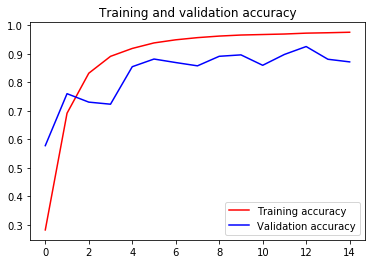

<Figure size 432x288 with 0 Axes>

In [8]:
# Plotting accuracies

import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [9]:
# Testing

import numpy as np
#from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()
#for fn in uploaded.keys():

# predicting images
path = 'K_test.jpg'
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

K_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


Using TensorFlow backend.
